# Pleque  for COMPASS-U Fiesta files
Pleque = PLasma EQUilibrium Enjoyment module

Before you run this notebook make sure you have loaded pleque module

```
module load pleque
```

Currrntly available equilibria are stored in 
```
/compass/Shared/Common/COMPASS-UPGRADE/RP1\ Design/Equilibria/v3.1
```

** Importants notes: **
* Only diverted plasmas are supported at the moment.
* Please consider that the module is in status "work in progress" and some things may change in the future.
* Latest version of a master branch can be found at https://repo.tok.ipp.cas.cz/kripner/pleque, please add an issue there if you find a bug or you would appreciate some enhancement of the module.  


In [ ]:
ls /compass/Shared/Common/COMPASS-UPGRADE/RP1\ Design/Equilibria/v3.1

#### Important imports:

In [11]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pleque.io import compass
from pleque.utils import plotting
import pleque.tests.utils as test_util
from pleque.core import SurfaceFunctions



In [14]:
test_util.get_test_cases_number()

7

  nx = 129, ny = 129
299 181
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for critical points ---
--- Recognizing equilibrium type ---
>> X-point plasma found.
--- Looking for LCFS: ---
Relative LCFS error: 1.0893335604665209e-12
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


<IPython.core.display.Javascript object>


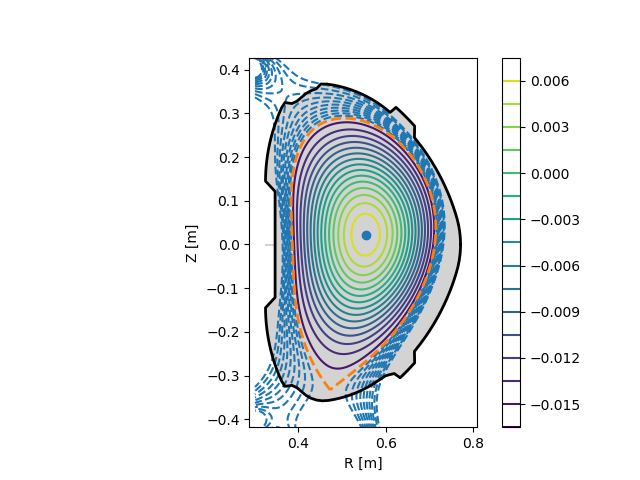

In [15]:
#fiesta_file_home = '/compass/Shared/Common/COMPASS-UPGRADE/RP1 Design/Equilibria/v3.1/'
#avail_equilibria = ('baseline_eqdsk', 'baseline_upward_eqdsk', 'DoubleNull_eqdsk', 'scenario_1_baseline_upward_eqdsk')
#eq = compass.read_fiesta_equilibrium(fiesta_file_home+avail_equilibria[0])

eq = compass.read_fiesta_equilibrium(test_util.get_test_equilibria_filenames()[4])


#from test.testing_utils import load_testing_equilibrium
#eq = test_util.load_testing_equilibrium(4)
plt.figure()
eq.plot_overview()

## Let's plot some basic info about equilibrium:

<IPython.core.display.Javascript object>


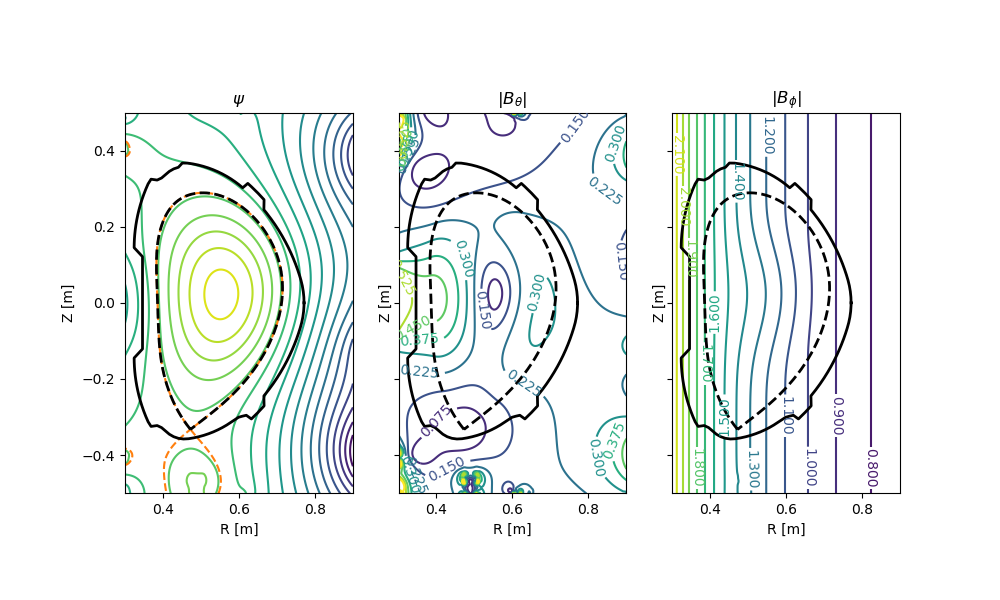

In [16]:
# generate simple grid for printing (instance of Coordinates class) 
grid = eq.grid((200,300),dim='size')

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,6))

# Fast decoration of the plot
def decorate_ax(ax: plt.Axes):
    ax.plot(eq.lcfs.R, eq.lcfs.Z, color='k', ls='--', lw=2)
    ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-', lw=2)
    ax.set_xlabel('R [m]')
    ax.set_ylabel('Z [m]')
    ax.set_aspect('equal')

# lets' plot psi
ax = axs[0]
ax.set_title(r'$\psi$')
# psi is one of the coordinates so it can be evaluate as grid.psi, 
# it is equivalent to eq.psi(grid)
ax.contour(grid.R, grid.Z, grid.psi, 20)
# plot lcfs and first wall (limiter)
ax.plot(eq.lcfs.R, eq.lcfs.Z, color='k', ls='--', lw=2)
ax.contour(grid.R, grid.Z, grid.psi, [eq.lcfs.psi[0]], colors='C1')
ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-', lw=2)


# some decoration: 
ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_aspect('equal')

# Now poloidal field: 
ax = axs[1]
ax.set_title(r'$|B_\theta|$')
# Magnetic field is not coordinate, so it must be called from Equilibrium class:
cs = ax.contour(grid.R, grid.Z, eq.B_pol(grid), np.linspace(0, 0.6, 9))
plt.clabel(cs, inline=1)
decorate_ax(ax)

ax = axs[2]
ax.set_title(r'$|B_\phi|$')
cs = ax.contour(grid.R, grid.Z, eq.B_tor(grid), 17)
plt.clabel(cs, inline=1)
decorate_ax(ax)



## Now some equilibrium midplane profiles:
As a first step we have to generate some midplane coordinates. 
We have multiple options for this. Let's choose the fastest way how to generete them. 
More options to generate coordinates will be shown later in the notebook. 


<IPython.core.display.Javascript object>


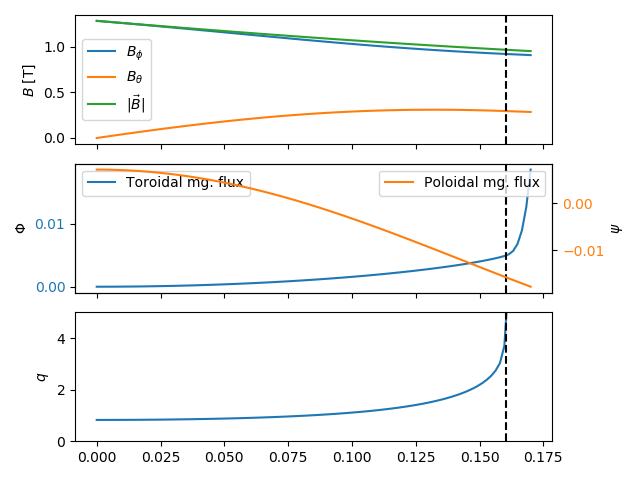

--- Generating q-splines ---
1%
11%
21%
31%
41%
51%
61%
71%
81%
91%


In [17]:
# we will generate coordinates in polar system with it's center on the magnetic axis:
# (!) there is lower case r, not capitalized R which denotes to cylindrical coordinates

# number of points
N = 100
# module automaticaly identify the type of the input: 
midplane = eq.coordinates(r=np.linspace(0, 0.17, N), theta=np.zeros(N))
# this is not the simpliest way... It will be more handy in the near future
r_sep = eq.lcfs.r[np.argmin(np.abs(eq.lcfs.theta))]


fig, axs = plt.subplots(3, 1, sharex=True)


# First profiles of magnetic fields on midplane: 
ax = axs[0]
# Profile of toroidal field: 
ax.plot(midplane.r, eq.B_tor(midplane), label=r'$B_\phi$')
# Profile of poloidal field: 
ax.plot(midplane.r, eq.B_pol(midplane), label=r'$B_\theta$')
# total
ax.plot(midplane.r, eq.B_abs(midplane), label=r'$|\vec B|$')
ax.axvline(r_sep, color='k', ls='--')
ax.set_ylabel(r'$B$ [T]')
ax.legend()


# Field coordinates (poloidal and toroidal flux)
ax = axs[1]
ax2 = ax.twinx()
# ax.plot(midplane.r, eq.tor_flux(r=midplane.r))
ax.plot(midplane.r, eq.tor_flux(midplane), 'C0', label='Toroidal mg. flux')
ax.axvline(r_sep, color='k', ls='--')
ax.tick_params(labelcolor='C0')
ax.set_ylabel(r'$\Phi$')
ax.legend()

ax2.plot(midplane.r, midplane.psi, 'C1', label='Poloidal mg. flux')
ax2.tick_params(labelcolor='C1')
ax2.set_ylabel(r'$\psi$')

ax2.legend()

# q-profile
ax = axs[2]
ax.plot(midplane.r, np.abs(eq.q(midplane)), label='q')
ax.set_ylabel(r'$q$')
ax.axvline(r_sep, color='k', ls='--')
ax.set_ylim([0, 5])


plt.tight_layout()

# ax = gca()
# ax.set_title(r'$\psi$')
# psi is one of the coordinates so it can be evaluate as grid.psi, 
# it is equivalent to eq.psi(grid)
# ax.contour(grid.R, grid.Z, grid.psi, 20)
# decorate_ax(ax)


## Spline interpolation of fitted data and mapping to various coordinates

(200,)


/home/evicka/anaconda3/envs/pleque_dev/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


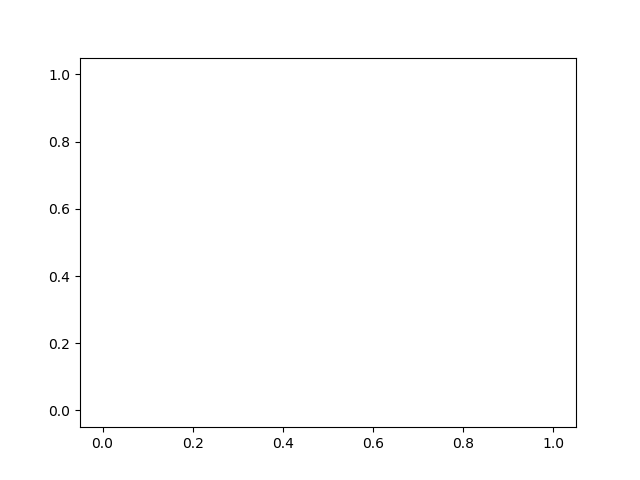

<IPython.core.display.Javascript object>


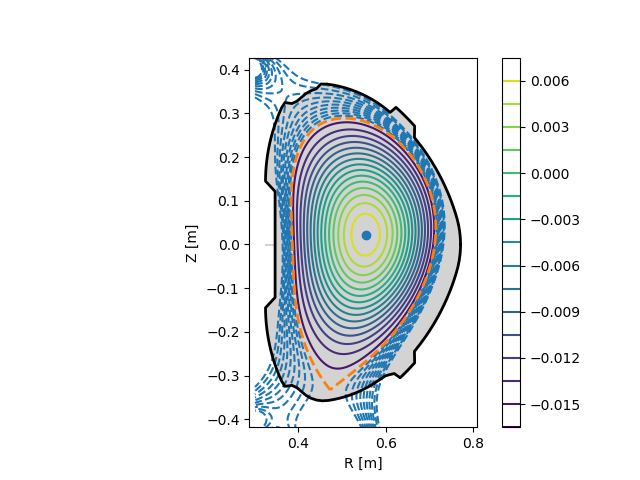

In [18]:
from scipy.special import erf

N = 200


chord1 = eq.coordinates(R=0.9*np.ones(N), Z=np.linspace(0.4, -0.1, N))
chord2 = eq.coordinates(R=np.linspace(0.65, 0.9, 20), Z=-0.1*np.ones(20))


# let's define some testing profile function: 
prof_func = lambda x, k1, xsep: k1/4 * (1 + erf((x-xsep)*20))*np.log((x+1)*5)
chord_prof = prof_func(1 - chord1.psi_n, 15, 0.1)
print(chord_prof.shape)

# todo here
plt.figure()
plt.plot(chord1.Z, chord_prof)
eq.fluxfuncs.add_flux_func('test_prof', chord_prof, chord1, spline_smooth=1)

#print(eq.fluxfuncs.test_prof(chord2))

plt.figure()
eq._plot_overview()




## Example of 2D spline interpolation for 2D random  and gauss function



In [ ]:
# function for 2D gaussian
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.
    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2 * np.pi) ** n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos - mu, Sigma_inv, pos - mu)

    return np.exp(-fac / 2) / N

In [ ]:
# define 2 coordinates r, z
N = 60
z = np.linspace(-0.4, 0.4, N)
r = np.linspace(0.3, 0.8, N)
R, Z = np.meshgrid(r, z)

# define random function
F1 = np.exp(-R/10.) * np.exp(-((Z-2)/1.5)**3)
result2d_spline1 = eq.surfacefuncs.add_surface_func('test', F1, r, z, spline_order=2, spline_smooth=0)

#mean & standard deviation 
mu = np.array([0., 0.5])
Sigma = np.array([[1.0, -0.5], [-1.5, 1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(R.shape + (2,))
pos[:, :, 0] = R
pos[:, :, 1] = Z

# The distribution on the variables X, Y packed into pos.
F2 = multivariate_gaussian(pos, mu, Sigma)

#apply 
result2d_spline2 = eq.surfacefuncs.add_surface_func('test', F2, r, z, spline_order=2, spline_smooth=0)


fig, axss = plt.subplots(1,2)
ax = axss[0]
ax.set_title('random function')
ax.contour(R, Z, F1, 30, colors='k', linestyles = ':', linewidths = 2)
ax.contour(r, z, result2d_spline1(r, z), 30,  cmap=cm.viridis)
ax.set_aspect('equal')
ax = axss[1]
ax.set_title('2D gauss')
ax.contour(R, Z, F2, 30, colors='k', linestyles = ':', linewidths = 2)
ax.contour(r, z, result2d_spline2(r, z), 30,  cmap=cm.viridis)
ax.set_aspect('equal')





## Test of 3D coordinates: 

In [ ]:
# Let's define some detector: 
# R = 1.25, Z = 0, phi = 0 pointing to (direction)
# x = -1, y = 0.5, z = 0

direction = np.array((-1, 0.6, 0.2))
direction /= np.linalg.norm(direction)
position = np.array((1.25, 0, -0.1))

# Let's define limiters: 
Ns = 100
inner_lim = eq.coordinates(np.min(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))
outer_lim = eq.coordinates(np.max(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))

# Line of view of the detector (i.e. camera pixel):
camera_view = eq.coordinates(position+direction[np.newaxis,:]*np.linspace(0, 2.0, 20)[:, np.newaxis], coord_type=('X', 'Y', 'Z'))

fig, axs = plt.subplots(1,2)
# Upper view:
ax = axs[0]
ax.plot(inner_lim.X, inner_lim.Y, 'k-')
ax.plot(outer_lim.X, outer_lim.Y, 'k-')
ax.plot(camera_view.X, camera_view.Y, 'x--', label='Chord of the view')
ax.plot(position[0], position[1], 'd', color='C0')
ax.legend()
ax.set_aspect('equal')

ax = axs[1]
ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-')
ax.plot(eq.lcfs.R, eq.lcfs.Z, 'k--')
ax.plot(camera_view.R, camera_view.Z, 'x--')
ax.plot(position[0], position[2], 'd', color='C0')
ax.set_aspect('equal')